# Semestrální práce na obrazvou analytiku - Tým 10

Technické řešení k semestrální práci týmu číslo 10

## Načtení knihoven a souboru credentials

In [116]:
from google.cloud import language_v1
from google.cloud import vision
from google.oauth2 import service_account
from IPython.display import Image
import matplotlib.pyplot as plt
from matplotlib.image import imread
import io
import os
import pandas as pd
import spacy

In [117]:
creds = service_account.Credentials.from_service_account_file('./credentials.json')
client = vision.ImageAnnotatorClient(credentials=creds)

## Načtení obrazových dat a analýza

In [118]:
path = './data/tym10'

In [119]:
def get_labels(image):
    with io.open(image, 'rb') as image_file:
        content = image_file.read()
    image = vision.Image(content = content)
    labels = client.label_detection(image=image).label_annotations
    return labels

In [120]:
labels_images = {}
directories = os.listdir(path)
for i in directories:
    if i.endswith('.jpg'):
        lbls = get_labels(os.path.join(path, i))
        lbl_set = [i.description for i in lbls]
        labels_images[os.path.join(path, i)] = lbl_set

In [121]:
tags = {}
for k, v in labels_images.items():
    for j in v:
        pocet = tags.get(j, [0, []])[0] + 1
        seznam = tags.get(j, [0, []])[1]
        seznam.append(k)
        tags[j] = [pocet, seznam]

In [122]:
sort_tabs = sorted(tags.items(), key = lambda x: x[1], reverse = True)
print(sort_tabs[0])

('Vegetation', [4, ['./data/tym10\\100101.jpg', './data/tym10\\100300.jpg', './data/tym10\\100501.jpg', './data/tym10\\106401.jpg']])


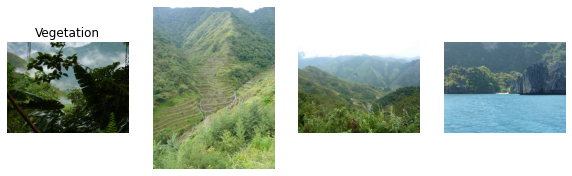

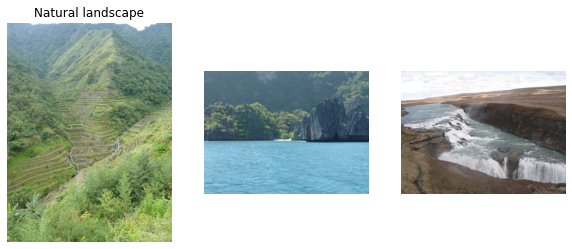

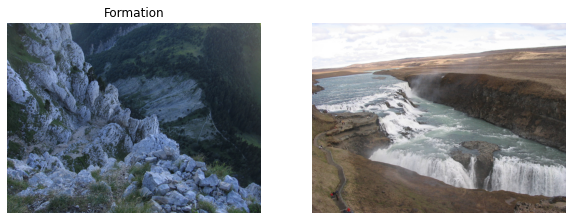

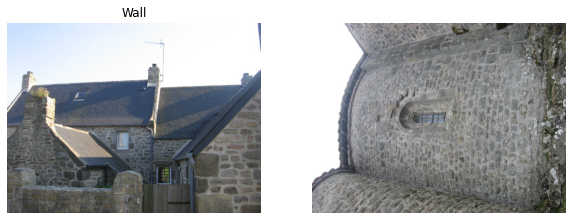

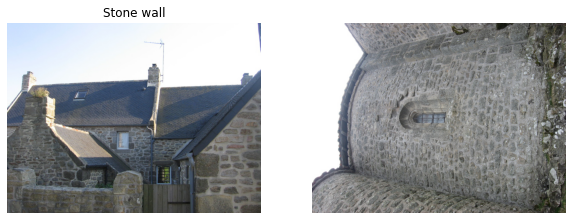

In [123]:
for k in range(10):
    pocet = sort_tabs[k][1][0]
    f, ax = plt.subplots(1, pocet, figsize = (10, 10))
    ax[0].set_title(sort_tabs[k][0])

    for i in range(pocet):
        ax[i].imshow(imread(sort_tabs[k][1][1][i]))
        ax[i].axis('off')

    plt.show()

## Vytvoření seznamu labels 

Vyfiltrování segnamu tagů z datasetu Hotel_reviews.csv

In [124]:
tags2 = {}
zoznam = []
for k, v in labels_images.items():
    for j in v:
        pocet = tags2.get(j, [0, []])[0] + 1
        seznam = tags2.get(j, [0, []])[1]
        seznam.append(k)
        zoznam.append(j)
        

In [125]:
print(zoznam)

['Vegetation', 'Nature', 'Forest', 'Atmospheric phenomenon', 'Terrestrial plant', 'Hill station', 'Jungle', 'Nature reserve', 'Biome', 'Rainforest', 'Vegetation', 'Green', 'Natural landscape', 'Highland', 'Terrain', 'Nature reserve', 'Slope', 'Valley', 'Green algae', 'Plantation', 'Vegetation', 'Mountainous landforms', 'Highland', 'Plant community', 'Hill', 'Mountain', 'Nature reserve', 'Forest', 'Valley', 'Atmospheric phenomenon', 'Underwater', 'Organism', 'Natural environment', 'Fluid', 'Water', 'Coral', 'Coral reef', 'Stony coral', 'Fish', 'Marine biology', 'Vegetation', 'Coastal and oceanic landforms', 'Natural landscape', 'Water resources', 'Nature reserve', 'Outcrop', 'Bedrock', 'Watercourse', 'Terrain', 'Klippe', 'Clock tower', 'Architecture', 'Glass', 'Clock', 'Spire', 'Steeple', 'Tower', 'Quartz clock', 'Listed building', 'Grazing', 'Landscape', 'Pasture', 'Bedrock', 'Outcrop', 'Valley', 'Ecoregion', 'Rock', 'Ranch', 'Rural area', 'Town', 'Neighbourhood', 'Architecture', 'Infr

In [126]:
zoznam_unique = []
for i in zoznam:
    if i not in zoznam_unique:
        zoznam_unique.append(i)

In [127]:
print(zoznam_unique)

['Vegetation', 'Nature', 'Forest', 'Atmospheric phenomenon', 'Terrestrial plant', 'Hill station', 'Jungle', 'Nature reserve', 'Biome', 'Rainforest', 'Green', 'Natural landscape', 'Highland', 'Terrain', 'Slope', 'Valley', 'Green algae', 'Plantation', 'Mountainous landforms', 'Plant community', 'Hill', 'Mountain', 'Underwater', 'Organism', 'Natural environment', 'Fluid', 'Water', 'Coral', 'Coral reef', 'Stony coral', 'Fish', 'Marine biology', 'Coastal and oceanic landforms', 'Water resources', 'Outcrop', 'Bedrock', 'Watercourse', 'Klippe', 'Clock tower', 'Architecture', 'Glass', 'Clock', 'Spire', 'Steeple', 'Tower', 'Quartz clock', 'Listed building', 'Grazing', 'Landscape', 'Pasture', 'Ecoregion', 'Rock', 'Ranch', 'Rural area', 'Town', 'Neighbourhood', 'Infrastructure', 'City', 'Urban area', 'Facade', 'Residential area', 'Metropolitan area', 'Street', 'Mast', 'Boat', 'Sailing ship', 'Tall ship', 'Watercraft', 'Barquentine', 'Ship', 'Barque', 'Windjammer', 'Full-rigged ship', 'Plastic', '

In [128]:
zoznam_string = ""
zoznam_string = " ".join(zoznam_unique)
print(zoznam_string)

Vegetation Nature Forest Atmospheric phenomenon Terrestrial plant Hill station Jungle Nature reserve Biome Rainforest Green Natural landscape Highland Terrain Slope Valley Green algae Plantation Mountainous landforms Plant community Hill Mountain Underwater Organism Natural environment Fluid Water Coral Coral reef Stony coral Fish Marine biology Coastal and oceanic landforms Water resources Outcrop Bedrock Watercourse Klippe Clock tower Architecture Glass Clock Spire Steeple Tower Quartz clock Listed building Grazing Landscape Pasture Ecoregion Rock Ranch Rural area Town Neighbourhood Infrastructure City Urban area Facade Residential area Metropolitan area Street Mast Boat Sailing ship Tall ship Watercraft Barquentine Ship Barque Windjammer Full-rigged ship Plastic Aqua Paint Solvent Property Wall House Roof Stone wall Home Door Cottage Brick Brickwork Geology Formation Geological phenomenon Wilderness Batholith Body of water Stream Fluvial landforms of streams Sculpture Carving Statue

In [129]:
words = zoznam_string.split()
zoznam_final = " ".join(sorted(set(words), key=words.index))
print(zoznam_final)

Vegetation Nature Forest Atmospheric phenomenon Terrestrial plant Hill station Jungle reserve Biome Rainforest Green Natural landscape Highland Terrain Slope Valley algae Plantation Mountainous landforms Plant community Mountain Underwater Organism environment Fluid Water Coral reef Stony coral Fish Marine biology Coastal and oceanic resources Outcrop Bedrock Watercourse Klippe Clock tower Architecture Glass Spire Steeple Tower Quartz clock Listed building Grazing Landscape Pasture Ecoregion Rock Ranch Rural area Town Neighbourhood Infrastructure City Urban Facade Residential Metropolitan Street Mast Boat Sailing ship Tall Watercraft Barquentine Ship Barque Windjammer Full-rigged Plastic Aqua Paint Solvent Property Wall House Roof Stone wall Home Door Cottage Brick Brickwork Geology Formation Geological Wilderness Batholith Body of water Stream Fluvial streams Sculpture Carving Statue Memorial carving Monument Creative arts Artifact Houseplant Flower Arranging Castle Ruins Medieval arc

## Načtení datasetů

Načtení datasetu Hotel_Reviews.csv a následného našeho datasetu destination.csv

In [130]:
df = pd.read_csv("Hotel_Reviews.csv", 
                 index_col=False, 
                 usecols=['Reviewer_Nationality', 'Hotel_Name', 'Average_Score', 'Tags', 'Negative_Review', 'Reviewer_Score', 'Reviewer_Nationality', 'Positive_Review'], 
                 dtype={'Reviewer_Nationality':"string", 'Hotel_Name':"string", 'Average_Score':"string", 'Negative_Review':"string", 'Reviewer_Nationality':"string", 'Positive_Review':"string", 'Tags':"string"})

In [131]:
dest = pd.read_csv("destinace.csv", 
                 index_col=False, 
                 usecols=['Destination', 'Description'], 
                 dtype={'Destination':"string", 'Description':"string"})

## Úprava datasetu

Vygenerování Tagů z datasetu Hote_Reviws.csv

In [132]:
h1 = df['Tags'].str.replace('"', '')
h1 = h1.str.replace("'", '')
h1 = h1.str.replace("[", '')
h1 = h1.str.replace("]", '')
h1 = h1.str.split(',')

In [133]:
tags = []
for i in h1:
    for j in i:
        tags.append(j)

In [134]:
Tags_unique = []
for tag in tags:
    if tag not in Tags_unique:
        Tags_unique.append(tag)
Tags_string = ""
Tags_string = Tags_string.join(Tags_unique)
words = Tags_string.split()
tags_final = " ".join(sorted(set(words), key=words.index))

## Podobnost Labels a Tagů

Pomocí SpaCy analyzujeme labels vůči tagům z datasetu Hotel_Reviews.csv, kvůli velkému počtu tagů jsme použili jen omezený výběr tagů a labelů. Samozřejmě správný postup by byl použit všechny.

In [135]:
nlp = spacy.load("en_core_web_md")
doc = nlp("Vegetation Nature Outcrop Bedrock Natural Landscape")
tag = nlp("Family Children View Leisure Business Pet Group Smoking Spa Pool Wifi")
similarity_map = pd.DataFrame(columns=doc)
for token in tag:
    for token2 in doc:
        similarity_map.loc[token, token2] = token.similarity(token2)
similarity_map.apply(pd.to_numeric).style.background_gradient(cmap ='PuRd')

## Porovnání Labels s popisem země - Anglie

Analýza labels s popisem země z datasetu destination.csv, v prvním případě jsme porovnávali pouze a Anglií a následně s Itálií. Bylo by samozřejmě lepší řešení, kdy by se labels porovnali se všema zeměmi rovnou. Na takové řešení jsme bohužel neměli čas.

In [136]:
England = dest['Description'].loc[0]

In [137]:
client = language_v1.LanguageServiceClient(credentials=creds)
language = "en"
type_ = language_v1.Document.Type.PLAIN_TEXT
encoding_type = language_v1.EncodingType.UTF8
document = {"content": England, "type_": type_, "language": language}

In [138]:
def analyze_entity(England):
    language = "en"
    type_ = language_v1.Document.Type.PLAIN_TEXT
    encoding_type = language_v1.EncodingType.UTF8
    document = {"content": England, "type_": type_, "language": language}
    response = client.analyze_entities(request = {'document': document, 'encoding_type': encoding_type})
    return response

In [139]:
response = analyze_entity(England)
for entity in response.entities:
    print(u"Název entity: {} - Typ entity: {} - Skóre: {}".format(
        entity.name,
        language_v1.Entity.Type(entity.type_).name,
        entity.salience))

Název entity: England - Typ entity: ORGANIZATION - Skóre: 0.4555723965167999
Název entity: lot - Typ entity: OTHER - Skóre: 0.0937189981341362
Název entity: scenery - Typ entity: OTHER - Skóre: 0.0937189981341362
Název entity: shores - Typ entity: LOCATION - Skóre: 0.0648878812789917
Název entity: cliffs - Typ entity: LOCATION - Skóre: 0.05967910587787628
Název entity: hills - Typ entity: LOCATION - Skóre: 0.05967910587787628
Název entity: fields - Typ entity: OTHER - Skóre: 0.056887321174144745
Název entity: moorland - Typ entity: LOCATION - Skóre: 0.045271579176187515
Název entity: plains - Typ entity: LOCATION - Skóre: 0.020075809210538864
Název entity: woods - Typ entity: OTHER - Skóre: 0.020075809210538864
Název entity: parks - Typ entity: LOCATION - Skóre: 0.015402572229504585
Název entity: Areas - Typ entity: OTHER - Skóre: 0.015030422247946262
Název entity: 10 - Typ entity: NUMBER - Skóre: 0.0


In [140]:
nlp = spacy.load("en_core_web_md")
doc = nlp("Vegetation Nature Outcrop Bedrock Natural Landscape")
tag = nlp("scenery shores cliffs hills plains parks")
similarity_map = pd.DataFrame(columns=doc)
for token in tag:
    for token2 in doc:
        similarity_map.loc[token, token2] = token.similarity(token2)
similarity_map.apply(pd.to_numeric).style.background_gradient(cmap ='PuRd')

## Porovnání Labels s popisem země - Italy

In [141]:
Italy = dest['Description'].loc[6]

In [142]:
client = language_v1.LanguageServiceClient(credentials=creds)
language = "en"
type_ = language_v1.Document.Type.PLAIN_TEXT
encoding_type = language_v1.EncodingType.UTF8
document = {"content": Italy, "type_": type_, "language": language}

In [143]:
def analyze_entity(Italy):
    language = "en"
    type_ = language_v1.Document.Type.PLAIN_TEXT
    encoding_type = language_v1.EncodingType.UTF8
    document = {"content": Italy, "type_": type_, "language": language}
    response = client.analyze_entities(request = {'document': document, 'encoding_type': encoding_type})
    return response

In [115]:
response = analyze_entity(Italy)
for entity in response.entities:
    print(u"Název entity: {} - Typ entity: {} - Skóre: {}".format(
        entity.name,
        language_v1.Entity.Type(entity.type_).name,
        entity.salience))

Název entity: Epicentre - Typ entity: OTHER - Skóre: 0.42794927954673767
Název entity: birthplace - Typ entity: LOCATION - Skóre: 0.09705044329166412
Název entity: Roman Empire - Typ entity: ORGANIZATION - Skóre: 0.05161425843834877
Název entity: Renaissance - Typ entity: OTHER - Skóre: 0.05161425843834877
Název entity: European - Typ entity: LOCATION - Skóre: 0.05161425843834877
Název entity: virtuoso groans - Typ entity: OTHER - Skóre: 0.03334570676088333
Název entity: weight - Typ entity: OTHER - Skóre: 0.03334570676088333
Název entity: cachet - Typ entity: OTHER - Skóre: 0.03334570676088333
Název entity: frescoes - Typ entity: WORK_OF_ART - Skóre: 0.026019327342510223
Název entity: presence - Typ entity: OTHER - Skóre: 0.022611932829022408
Název entity: Birth of Venus - Typ entity: EVENT - Skóre: 0.01545633189380169
Název entity: Botticelli - Typ entity: PERSON - Skóre: 0.01358750183135271
Název entity: Sistine Chapel - Typ entity: LOCATION - Skóre: 0.01358750183135271
Název entity

In [144]:
nlp = spacy.load("en_core_web_md")
doc = nlp("Vegetation Nature Outcrop Bedrock Natural Landscape")
tag = nlp("Chapel frescoes Renaissance Botticelli Unesco treasures sites")
similarity_map = pd.DataFrame(columns=doc)
for token in tag:
    for token2 in doc:
        similarity_map.loc[token, token2] = token.similarity(token2)
similarity_map.apply(pd.to_numeric).style.background_gradient(cmap ='PuRd')